In [1]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import math
import json
import nltk
import string
import re
import inflect
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.offline as py
import plotly.express as px
from plotly import tools
import plotly.figure_factory as ff
import warnings
from matplotlib import pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
# unzip the dataset
import os
zip_path = os.path.join(os.path.join('drive', 'My Drive', 'Dissertation'), 'df_news_combined.csv.zip')
!cp '{zip_path}' .
!yes|unzip -q df_news_combined.csv.zip
!rm df_news_combined.csv.zip
print(os.listdir(os.path.join('drive', 'My Drive', 'Dissertation')))

['df_news_combined.csv.zip', 'trails.ipynb', 'xgboost_base_and_tuned.ipynb', 'random_forest_base_and_tuned.ipynb', 'stochastic_gradient_descent_base_and_tuned', 'lstm_base_and_tuned.ipynb', 'cnn_base_and_tuned.ipynb', 'tableau_data_analysis.jpg', 'naivebayes_base_and_tuned.ipynb', 'gru_base_and_tuned.ipynb', 'mlp_base_and_tuned.ipynb', 'data_collection_and_data_cleaning.ipynb', 'business.csv', 'entertainment.csv', 'environment.csv', 'food.csv', 'health.csv', 'politics.csv', 'sports.csv', 'data_visualisation.ipynb']


In [4]:
# read the dataset
df_news_com = pd.read_csv('df_news_combined.csv')
df_news_com

,TITLE,ARTICLE LINK,AUTHOR,PUBLISHER,COUNTRY,CATEGORY,LANGUAGE,DESCRIPTION,IMAGE URL,VIDEO URL,DATE,GMT,POSTAG
0,"""Business duo turn over $70K a month with thei...",https://www.dailymail.co.uk/femail/article-107...,Unknown,Mail Online,United Kingdom,Food,English,business duo create home hair kit bridge gap b...,https://i.dailymail.co.uk/1s/2022/04/29/05/571...,Unknown,05/01/2022,00:16,"[('business', 'NN'), ('duo', 'NN'), ('created'..."
1,"""People Are Sharing ""Impulsive And Expensive"" ...",https://www.buzzfeed.com/fabianabuontempo/peop...,Unknown,Buzzfeed,United Kingdom,Food,English,definitely need love make confident secure hap...,https://img.buzzfeed.com/buzzfeed-static/stati...,Unknown,05/01/2022,00:25,"[('definitely', 'RB'), ('need', 'MD'), ('love'..."
2,"""Why You Shouldn't Butter The Pan When Making ...",https://www.buzzfeed.com/rossyoder/culinary-sc...,Unknown,Buzzfeed,United Kingdom,Food,English,class session view entire post,https://img.buzzfeed.com/buzzfeed-static/stati...,Unknown,05/01/2022,00:25,"[('class', 'NN'), ('session', 'NN'), ('view', ..."
3,"""Quaint beachside cottage on the Mornington Pe...",https://www.dailymail.co.uk/femail/homes/artic...,Unknown,Mail Online,United Kingdom,Food,English,ultra chic contemporary home lap pool tennis c...,https://i.dailymail.co.uk/1s/2022/04/29/07/571...,Unknown,05/01/2022,00:53,"[('ultra', 'JJ'), ('chic', 'JJ'), ('contempora..."
4,"""Viral Tiktok claims Sunnyboys were back at Wo...",https://www.dailymail.co.uk/femail/food/articl...,Unknown,Mail Online,United Kingdom,Food,English,australian shoppers send spin tiktok clip go v...,https://i.dailymail.co.uk/1s/2022/05/01/02/572...,Unknown,05/01/2022,01:32,"[('australian', 'JJ'), ('shoppers', 'NNS'), ('..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823100,"""'New Zealand condemns Russias annexation atte...",http://www.voxy.co.nz/politics/5/407843,Unknown,Voxy,New Zealand,Politics,English,new zealand condemn unequivocally russias atte...,Unknown,Unknown,30/09/2022,23:02,"[('new', 'JJ'), ('zealand', 'NNP'), ('condemns..."
823101,"""Nigeria @ 62: So far, not so good""",https://punchng.com/nigeria-62-so-far-not-so-g...,Our Reporters,Punch,Nigeria,Politics,English,leke baiyewu abiodun sanusi x ray political hi...,Unknown,Unknown,30/09/2022,23:25,"[('leke', 'NN'), ('baiyewu', 'NN'), ('abiodun'..."
823102,"""Most Voters Say Trump Should Not Be Allowed T...",https://www.huffpost.com/entry/voters-donald-t...,Unknown,Huffpost,United States Of America,Politics,English,apparently go give know ongoing investigations...,Unknown,Unknown,30/09/2022,23:25,"[('apparently', 'RB'), ('go', 'VB'), ('given',..."
823103,"""Babayemi congratulates Adeleke on Supreme Cou...",https://punchng.com/babayemi-congratulates-ade...,Bola Bamigbola,Punch,Nigeria,Politics,English,former governorship aspirant platform people d...,Unknown,Unknown,30/09/2022,23:44,"[('former', 'JJ'), ('governorship', 'NN'), ('a..."


In [5]:
# reference - https://note.nkmk.me/en/python-pandas-nan-judge-count/
# checking for the missing values
df_news_com.isnull().sum()
# note - the reason this dataset is showing null values again beacause it is converted in the zip file, so the null values occured automatically even after doing the data cleaning.
# note - the code is been adapted from the reference and it is modified

TITLE            0
ARTICLE LINK     0
AUTHOR          27
PUBLISHER        0
COUNTRY          0
CATEGORY         0
LANGUAGE         0
DESCRIPTION     91
IMAGE URL        0
VIDEO URL        0
DATE             0
GMT              0
POSTAG           0
dtype: int64

In [6]:
# reference - https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/
# replacing the null values with the unknown
df_news_com['AUTHOR'] = df_news_com['AUTHOR'].fillna('Unknown')
df_news_com['DESCRIPTION'] = df_news_com['DESCRIPTION'].fillna('Unknown')
# note - the code is been adapted from the reference and it is modified

In [7]:
# reference - https://note.nkmk.me/en/python-pandas-nan-judge-count/
# checking for the missing values
df_news_com.isnull().sum()
# note - the code is been adapted from the reference and it is modified

TITLE           0
ARTICLE LINK    0
AUTHOR          0
PUBLISHER       0
COUNTRY         0
CATEGORY        0
LANGUAGE        0
DESCRIPTION     0
IMAGE URL       0
VIDEO URL       0
DATE            0
GMT             0
POSTAG          0
dtype: int64

In [8]:
# getting the info
df_news_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823105 entries, 0 to 823104
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   TITLE         823105 non-null  object
 1   ARTICLE LINK  823105 non-null  object
 2   AUTHOR        823105 non-null  object
 3   PUBLISHER     823105 non-null  object
 4   COUNTRY       823105 non-null  object
 5   CATEGORY      823105 non-null  object
 6   LANGUAGE      823105 non-null  object
 7   DESCRIPTION   823105 non-null  object
 8   IMAGE URL     823105 non-null  object
 9   VIDEO URL     823105 non-null  object
 10  DATE          823105 non-null  object
 11  GMT           823105 non-null  object
 12  POSTAG        823105 non-null  object
dtypes: object(13)
memory usage: 81.6+ MB


In [9]:
# reference - https://www.statology.org/pandas-to-string/
# converting the description column to string
df_news_com['DESCRIPTION'] = df_news_com['DESCRIPTION'].astype('str')
# note - the code is been adapted from the reference and it is modified

In [10]:
# reference - https://www.analyticsvidhya.com/blog/2021/06/rule-based-sentiment-analysis-in-python/
# creating function to get the polarity
def polarity(review):
    return TextBlob(review).sentiment.polarity
# function to analyze the reviews
def polarity_score(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
# note - the code is been adapted from the reference and it is modified

In [11]:
# reference - https://www.analyticsvidhya.com/blog/2021/06/rule-based-sentiment-analysis-in-python/
# applying the polarity function to the combined dataset
df_news_com['POLARITY'] = df_news_com['DESCRIPTION'].apply(polarity)
df_news_com['POLARITY']
# note - the code is been adapted from the reference and it is modified

0        -0.500000
1         0.457143
2         0.000000
3        -0.116667
4        -0.033333
            ...   
823100   -0.287879
823101    0.160417
823102    0.016667
823103    0.400000
823104    0.000000
Name: POLARITY, Length: 823105, dtype: float64

In [12]:
# reference - https://www.analyticsvidhya.com/blog/2021/06/rule-based-sentiment-analysis-in-python/
# applying the analysis function to the combined dataset to check the sentiments
df_news_com['SENTIMENT'] = df_news_com['POLARITY'].apply(polarity_score)
df_news_com.head()
# note - the code is been adapted from the reference and it is modified

,TITLE,ARTICLE LINK,AUTHOR,PUBLISHER,COUNTRY,CATEGORY,LANGUAGE,DESCRIPTION,IMAGE URL,VIDEO URL,DATE,GMT,POSTAG,POLARITY,SENTIMENT
0,"""Business duo turn over $70K a month with thei...",https://www.dailymail.co.uk/femail/article-107...,Unknown,Mail Online,United Kingdom,Food,English,business duo create home hair kit bridge gap b...,https://i.dailymail.co.uk/1s/2022/04/29/05/571...,Unknown,05/01/2022,00:16,"[('business', 'NN'), ('duo', 'NN'), ('created'...",-0.500000,Negative
1,"""People Are Sharing ""Impulsive And Expensive"" ...",https://www.buzzfeed.com/fabianabuontempo/peop...,Unknown,Buzzfeed,United Kingdom,Food,English,definitely need love make confident secure hap...,https://img.buzzfeed.com/buzzfeed-static/stati...,Unknown,05/01/2022,00:25,"[('definitely', 'RB'), ('need', 'MD'), ('love'...",0.457143,Positive
2,"""Why You Shouldn't Butter The Pan When Making ...",https://www.buzzfeed.com/rossyoder/culinary-sc...,Unknown,Buzzfeed,United Kingdom,Food,English,class session view entire post,https://img.buzzfeed.com/buzzfeed-static/stati...,Unknown,05/01/2022,00:25,"[('class', 'NN'), ('session', 'NN'), ('view', ...",0.000000,Neutral
3,"""Quaint beachside cottage on the Mornington Pe...",https://www.dailymail.co.uk/femail/homes/artic...,Unknown,Mail Online,United Kingdom,Food,English,ultra chic contemporary home lap pool tennis c...,https://i.dailymail.co.uk/1s/2022/04/29/07/571...,Unknown,05/01/2022,00:53,"[('ultra', 'JJ'), ('chic', 'JJ'), ('contempora...",-0.116667,Negative
4,"""Viral Tiktok claims Sunnyboys were back at Wo...",https://www.dailymail.co.uk/femail/food/articl...,Unknown,Mail Online,United Kingdom,Food,English,australian shoppers send spin tiktok clip go v...,https://i.dailymail.co.uk/1s/2022/05/01/02/572...,Unknown,05/01/2022,01:32,"[('australian', 'JJ'), ('shoppers', 'NNS'), ('...",-0.033333,Negative


In [13]:
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.month_name.html
# reference - https://stackoverflow.com/questions/72426371/extract-month-name-from-date-column-pandas
# creating the month column
df_news_com['MONTH'] = pd.DatetimeIndex(df_news_com['DATE']).month_name()
df_news_com.head()
# note - the code is been adapted from the references and it is modified

,TITLE,ARTICLE LINK,AUTHOR,PUBLISHER,COUNTRY,CATEGORY,LANGUAGE,DESCRIPTION,IMAGE URL,VIDEO URL,DATE,GMT,POSTAG,POLARITY,SENTIMENT,MONTH
0,"""Business duo turn over $70K a month with thei...",https://www.dailymail.co.uk/femail/article-107...,Unknown,Mail Online,United Kingdom,Food,English,business duo create home hair kit bridge gap b...,https://i.dailymail.co.uk/1s/2022/04/29/05/571...,Unknown,05/01/2022,00:16,"[('business', 'NN'), ('duo', 'NN'), ('created'...",-0.500000,Negative,May
1,"""People Are Sharing ""Impulsive And Expensive"" ...",https://www.buzzfeed.com/fabianabuontempo/peop...,Unknown,Buzzfeed,United Kingdom,Food,English,definitely need love make confident secure hap...,https://img.buzzfeed.com/buzzfeed-static/stati...,Unknown,05/01/2022,00:25,"[('definitely', 'RB'), ('need', 'MD'), ('love'...",0.457143,Positive,May
2,"""Why You Shouldn't Butter The Pan When Making ...",https://www.buzzfeed.com/rossyoder/culinary-sc...,Unknown,Buzzfeed,United Kingdom,Food,English,class session view entire post,https://img.buzzfeed.com/buzzfeed-static/stati...,Unknown,05/01/2022,00:25,"[('class', 'NN'), ('session', 'NN'), ('view', ...",0.000000,Neutral,May
3,"""Quaint beachside cottage on the Mornington Pe...",https://www.dailymail.co.uk/femail/homes/artic...,Unknown,Mail Online,United Kingdom,Food,English,ultra chic contemporary home lap pool tennis c...,https://i.dailymail.co.uk/1s/2022/04/29/07/571...,Unknown,05/01/2022,00:53,"[('ultra', 'JJ'), ('chic', 'JJ'), ('contempora...",-0.116667,Negative,May
4,"""Viral Tiktok claims Sunnyboys were back at Wo...",https://www.dailymail.co.uk/femail/food/articl...,Unknown,Mail Online,United Kingdom,Food,English,australian shoppers send spin tiktok clip go v...,https://i.dailymail.co.uk/1s/2022/05/01/02/572...,Unknown,05/01/2022,01:32,"[('australian', 'JJ'), ('shoppers', 'NNS'), ('...",-0.033333,Negative,May


In [14]:
# reference - https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day_name.html
# reference - https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python
# creating the weekday column
df_news_com['WEEKDAY'] = pd.DatetimeIndex(df_news_com['DATE']).day_name()
df_news_com.head()
# note - the code is been adapted from the references and it is modified

,TITLE,ARTICLE LINK,AUTHOR,PUBLISHER,COUNTRY,CATEGORY,LANGUAGE,DESCRIPTION,IMAGE URL,VIDEO URL,DATE,GMT,POSTAG,POLARITY,SENTIMENT,MONTH,WEEKDAY
0,"""Business duo turn over $70K a month with thei...",https://www.dailymail.co.uk/femail/article-107...,Unknown,Mail Online,United Kingdom,Food,English,business duo create home hair kit bridge gap b...,https://i.dailymail.co.uk/1s/2022/04/29/05/571...,Unknown,05/01/2022,00:16,"[('business', 'NN'), ('duo', 'NN'), ('created'...",-0.500000,Negative,May,Sunday
1,"""People Are Sharing ""Impulsive And Expensive"" ...",https://www.buzzfeed.com/fabianabuontempo/peop...,Unknown,Buzzfeed,United Kingdom,Food,English,definitely need love make confident secure hap...,https://img.buzzfeed.com/buzzfeed-static/stati...,Unknown,05/01/2022,00:25,"[('definitely', 'RB'), ('need', 'MD'), ('love'...",0.457143,Positive,May,Sunday
2,"""Why You Shouldn't Butter The Pan When Making ...",https://www.buzzfeed.com/rossyoder/culinary-sc...,Unknown,Buzzfeed,United Kingdom,Food,English,class session view entire post,https://img.buzzfeed.com/buzzfeed-static/stati...,Unknown,05/01/2022,00:25,"[('class', 'NN'), ('session', 'NN'), ('view', ...",0.000000,Neutral,May,Sunday
3,"""Quaint beachside cottage on the Mornington Pe...",https://www.dailymail.co.uk/femail/homes/artic...,Unknown,Mail Online,United Kingdom,Food,English,ultra chic contemporary home lap pool tennis c...,https://i.dailymail.co.uk/1s/2022/04/29/07/571...,Unknown,05/01/2022,00:53,"[('ultra', 'JJ'), ('chic', 'JJ'), ('contempora...",-0.116667,Negative,May,Sunday
4,"""Viral Tiktok claims Sunnyboys were back at Wo...",https://www.dailymail.co.uk/femail/food/articl...,Unknown,Mail Online,United Kingdom,Food,English,australian shoppers send spin tiktok clip go v...,https://i.dailymail.co.uk/1s/2022/05/01/02/572...,Unknown,05/01/2022,01:32,"[('australian', 'JJ'), ('shoppers', 'NNS'), ('...",-0.033333,Negative,May,Sunday


In [15]:
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.hour.html
# creating the hour column
df_news_com['HOUR'] = pd.to_datetime(df_news_com['GMT'], format='%H:%M').dt.hour
df_news_com.head()
# note - the code is been adapted from the reference and it is modified

,TITLE,ARTICLE LINK,AUTHOR,PUBLISHER,COUNTRY,CATEGORY,LANGUAGE,DESCRIPTION,IMAGE URL,VIDEO URL,DATE,GMT,POSTAG,POLARITY,SENTIMENT,MONTH,WEEKDAY,HOUR
0,"""Business duo turn over $70K a month with thei...",https://www.dailymail.co.uk/femail/article-107...,Unknown,Mail Online,United Kingdom,Food,English,business duo create home hair kit bridge gap b...,https://i.dailymail.co.uk/1s/2022/04/29/05/571...,Unknown,05/01/2022,00:16,"[('business', 'NN'), ('duo', 'NN'), ('created'...",-0.500000,Negative,May,Sunday,0
1,"""People Are Sharing ""Impulsive And Expensive"" ...",https://www.buzzfeed.com/fabianabuontempo/peop...,Unknown,Buzzfeed,United Kingdom,Food,English,definitely need love make confident secure hap...,https://img.buzzfeed.com/buzzfeed-static/stati...,Unknown,05/01/2022,00:25,"[('definitely', 'RB'), ('need', 'MD'), ('love'...",0.457143,Positive,May,Sunday,0
2,"""Why You Shouldn't Butter The Pan When Making ...",https://www.buzzfeed.com/rossyoder/culinary-sc...,Unknown,Buzzfeed,United Kingdom,Food,English,class session view entire post,https://img.buzzfeed.com/buzzfeed-static/stati...,Unknown,05/01/2022,00:25,"[('class', 'NN'), ('session', 'NN'), ('view', ...",0.000000,Neutral,May,Sunday,0
3,"""Quaint beachside cottage on the Mornington Pe...",https://www.dailymail.co.uk/femail/homes/artic...,Unknown,Mail Online,United Kingdom,Food,English,ultra chic contemporary home lap pool tennis c...,https://i.dailymail.co.uk/1s/2022/04/29/07/571...,Unknown,05/01/2022,00:53,"[('ultra', 'JJ'), ('chic', 'JJ'), ('contempora...",-0.116667,Negative,May,Sunday,0
4,"""Viral Tiktok claims Sunnyboys were back at Wo...",https://www.dailymail.co.uk/femail/food/articl...,Unknown,Mail Online,United Kingdom,Food,English,australian shoppers send spin tiktok clip go v...,https://i.dailymail.co.uk/1s/2022/05/01/02/572...,Unknown,05/01/2022,01:32,"[('australian', 'JJ'), ('shoppers', 'NNS'), ('...",-0.033333,Negative,May,Sunday,1


In [16]:
# reference - https://plotly.com/python/pie-charts/
# reference - https://plotly.com/python/bar-charts/
# reference - hhttps://www.kaggle.com/code/sercanyesiloz/plotly-tutorial/notebook#Subplots
# plotting the percentage and the count of news
fig = make_subplots(rows=1,cols=2,subplot_titles=('NEWS CATEGORY PERCENTAGE','NEWS CATEGORY COUNT'),
                    specs=[[{"type": "domain"},{'type':'xy'}]])

pie_labels = df_news_com['CATEGORY'].value_counts()
pie_values = df_news_com['CATEGORY'].value_counts()

m_colors =  ['rgb(227, 181, 5)', 'rgb(149, 25, 12)', 'rgb(97, 3, 69)','rgb(16, 126, 125)', 'rgb(4, 75, 127)']
fig.add_trace(go.Pie(labels = pie_labels,
                     values = pie_values,
                     textfont = dict(color = 'white'),
                     showlegend = False,
                     marker_colors = m_colors),
                     row = 1, col = 1)

bar_x = df_news_com['CATEGORY'].value_counts().index
bar_y = df_news_com['CATEGORY'].value_counts()
bar_text = df_news_com['CATEGORY'].value_counts()
fig.add_trace(go.Bar( x = bar_x,
                      y = bar_y,
                      text = bar_text,
                      textfont = dict(color = 'white'),
                      showlegend = False,
                      marker = dict(color = ['rgb(227, 181, 5)', 'rgb(149, 25, 12)', 'rgb(97, 3, 69)', 
                      'rgb(16, 126, 125)', 'rgb(4, 75, 127)'])),
                      row = 1, col = 2)

fig.update_layout(title = "PERCENTAGE AND COUNT OF NEWS CATEGORY",template='plotly_dark', height = 600, title_x=0.5)
fig.update_annotations(font_size=13)
iplot(fig)
# note - the code is been adapted from the references and it is modified

In [17]:
# reference - https://www.kaggle.com/code/sercanyesiloz/plotly-tutorial/notebook#Subplots
# reference - https://plotly.com/python/pie-charts/
# reference - https://plotly.com/python/bar-charts/
fig1 = make_subplots(rows=1,cols=2,subplot_titles=('SENTIMENT COUNT','SENTIMENT PERCENTAGE'),
                    specs=[[{"type": "xy"},{'type':'domain'}]])

bar_x1 = df_news_com['SENTIMENT'].value_counts().index
bar_y1 = df_news_com['SENTIMENT'].value_counts()
bar_text1 = df_news_com['SENTIMENT'].value_counts()
fig1.add_trace(go.Bar( y = bar_y1,
                      x = bar_x1,
                      text = bar_text1,
                      textfont = dict(color = 'white'),
                      showlegend = False,
                      marker = dict(color = ['#177E89', '#084C61', '#DB3A34'])),
                      row = 1, col = 1)

pie_labels1 = df_news_com['SENTIMENT'].value_counts()
pie_values1 = df_news_com['SENTIMENT'].value_counts()

fig1.add_trace(go.Pie(labels = pie_labels1,
                     values = pie_values1,hole = 0.39,
                     textfont = dict(color = 'white'),
                     showlegend = False,
                     marker_colors = ['#177E89', '#084C61', '#DB3A34']),
                     row = 1, col = 2)
fig1.update_layout(title = "PERCENTAGE AND COUNT OF SENTIMENT",template='plotly_dark', height = 600, title_x=0.5)
fig1.update_annotations(font_size=13)
iplot(fig1)

In [18]:
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# grouping the category and sentiment
df_news_sentiment = df_news_com[["CATEGORY", "SENTIMENT"]].groupby(["CATEGORY", "SENTIMENT"]).size().reset_index(name="NEWS")
df_news_sentiment.head()
# note - the code is been adapted from the reference and it is modified

,CATEGORY,SENTIMENT,NEWS
0,Business,Negative,33769
1,Business,Neutral,52039
2,Business,Positive,98386
3,Entertainment,Negative,43710
4,Entertainment,Neutral,58662


In [19]:
# reference - https://stackoverflow.com/questions/71549352/plotly-express-heatmap-using-pandas-dataframe
# reference - https://stackoverflow.com/questions/40161806/sorting-column-label-pandas-pivot-table
# create the plot for the sentiment of each news category
import plotly.express as px
df_news_sentiment1 = df_news_sentiment.pivot(index='CATEGORY', columns='SENTIMENT')['NEWS']
df_news_sentiment1 = df_news_sentiment1[["Positive","Negative","Neutral"]]
fig = px.imshow(df_news_sentiment1, x=df_news_sentiment1.columns, y=df_news_sentiment1.index,text_auto=True,color_continuous_scale='portland')
fig.update_layout(width=700,height=700,template = 'plotly_dark',title_text="SENTIMENT COUNT OF EACH CATEGORY")
iplot(fig)
#note - the code is been adapted from the references and it is modified

In [20]:
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# grouping the country and sentiment
df_news_sentiment_country = df_news_com[["COUNTRY", "SENTIMENT"]].groupby(["COUNTRY", "SENTIMENT"]).size().reset_index(name="NEWS")
df_news_sentiment_country.head()
# note - the code is been adapted from the reference and it is modified

,COUNTRY,SENTIMENT,NEWS
0,Australia,Negative,10470
1,Australia,Neutral,11995
2,Australia,Positive,32194
3,Canada,Negative,11630
4,Canada,Neutral,13687


In [21]:
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.Index.get_level_values.html
# creating pivot table for the country and sentiment
df_news_sentiment_country1 = df_news_sentiment_country.pivot_table(index=['COUNTRY'], columns=['SENTIMENT']).reset_index().set_index('COUNTRY')
df_news_sentiment_country1.columns = df_news_sentiment_country1.columns.get_level_values('SENTIMENT')
df_news_sentiment_country1.index.name = None
df_news_sentiment_country1.columns.name = None
df_news_sentiment_country1.head()
# note - the code is been adapted from the references and it is modified

,Negative,Neutral,Positive
Australia,10470,11995,32194
Canada,11630,13687,38701
China,613,711,1416
Cuba,183,11,1182
France,188,275,583


In [22]:
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# creating the dataframe as per the country for sentiments
df_news_sentiment_country1['Average'] = df_news_sentiment_country1[list(df_news_sentiment_country1.columns)].mean(axis=1).astype(int)
df_news_sentiment_country1.index.name = 'COUNTRY'
df_news_sentiment_country1 = df_news_sentiment_country1.reset_index(level=0)
df_news_sentiment_country1.head()
# note - the code is been adapted from the references and it is modified

,COUNTRY,Negative,Neutral,Positive,Average
0,Australia,10470,11995,32194,18219
1,Canada,11630,13687,38701,21339
2,China,613,711,1416,913
3,Cuba,183,11,1182,458
4,France,188,275,583,348


In [23]:
# reference - https://plotly.com/python/line-and-scatter/
# reference - https://plotly.com/python/reference/layout/
# reference - https://www.kaggle.com/code/sercanyesiloz/plotly-tutorial/notebook#Line%20Charts
# reference - https://linuxhint.com/plotly-graph-objects-scatter/
# plotting the average sentiments per country
df_news_sentiment_country2 = go.Scatter(x = df_news_sentiment_country1['COUNTRY'],
                     y = df_news_sentiment_country1['Average'],
                     mode="markers+lines",
                     marker = dict(color = 'limegreen'))
sentiment_country_layout = go.Layout(title={'text' : 'AVERAGE SENTIMENTS PER COUNTRY'},xaxis=dict(title = 'COUNTRIES'),yaxis=dict(title='AVERAGE NUMBER OF SENTIMENTS'),
                   template = 'plotly_dark')
fig = go.Figure(data = df_news_sentiment_country2,layout=sentiment_country_layout)
iplot(fig)
# note - the code is been adapted from the references and it is modified

In [24]:
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# grouping the country and sentiment
df_news_country_category = df_news_com[["COUNTRY", "CATEGORY"]].groupby(["COUNTRY", "CATEGORY"]).size().reset_index(name="NEWS")
df_news_country_category.head()
# note - the code is been adapted from the reference and it is modified

,COUNTRY,CATEGORY,NEWS
0,Australia,Business,10559
1,Australia,Entertainment,10461
2,Australia,Environment,169
3,Australia,Food,490
4,Australia,Health,3295


In [25]:
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.Index.get_level_values.html
# creating pivot table for the country and category
df_news_country_category1 = df_news_country_category.pivot_table(index=['COUNTRY'], columns=['CATEGORY']).reset_index().set_index('COUNTRY')
df_news_country_category1.columns = df_news_country_category1.columns.get_level_values('CATEGORY')
df_news_country_category1.index.name = None
df_news_country_category1.columns.name = None
df_news_country_category1.head()
# note - the code is been adapted from the references and it is modified

,Business,Entertainment,Environment,Food,Health,Politics,Sports
Australia,10559.0,10461.0,169.0,490.0,3295.0,5314.0,24371.0
Canada,20903.0,25873.0,NaN,NaN,4299.0,2124.0,10819.0
China,1205.0,NaN,NaN,NaN,114.0,NaN,1421.0
Cuba,241.0,211.0,NaN,NaN,78.0,618.0,228.0
France,60.0,94.0,593.0,NaN,8.0,6.0,285.0


In [26]:
# reference - https://www.w3schools.com/python/pandas/ref_df_fillna.asp
# reference - https://www.delftstack.com/howto/python-pandas/how-to-convert-float-to-int-in-pandas-dataframe/
# replacing the null values with the zero and convert the float into integer
df_news_country_category1 = df_news_country_category1.fillna(0)
df_news_country_category1 = df_news_country_category1.astype(int)
df_news_country_category1.head()

,Business,Entertainment,Environment,Food,Health,Politics,Sports
Australia,10559,10461,169,490,3295,5314,24371
Canada,20903,25873,0,0,4299,2124,10819
China,1205,0,0,0,114,0,1421
Cuba,241,211,0,0,78,618,228
France,60,94,593,0,8,6,285


In [27]:
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# creating the dataframe as per the country for news
df_news_country_category1['Average'] = df_news_country_category1[list(df_news_country_category1.columns)].mean(axis=1).astype(int)
df_news_country_category1.index.name = 'COUNTRY'
df_news_country_category1 = df_news_country_category1.reset_index(level=0)
df_news_country_category1.head()
# note - the code is been adapted from the references and it is modified

,COUNTRY,Business,Entertainment,Environment,Food,Health,Politics,Sports,Average
0,Australia,10559,10461,169,490,3295,5314,24371,7808
1,Canada,20903,25873,0,0,4299,2124,10819,9145
2,China,1205,0,0,0,114,0,1421,391
3,Cuba,241,211,0,0,78,618,228,196
4,France,60,94,593,0,8,6,285,149


In [28]:
# reference - https://plotly.com/python/line-and-scatter/
# reference - https://plotly.com/python/reference/layout/
# reference - https://www.kaggle.com/code/sercanyesiloz/plotly-tutorial/notebook#Line%20Charts
# reference - https://linuxhint.com/plotly-graph-objects-scatter/
# plotting the average news per country
df_news_country_category2 = go.Scatter(x = df_news_country_category1['COUNTRY'],
                     y = df_news_country_category1['Average'],
                     mode="markers+lines",
                     marker = dict(color = 'mediumslateblue'))
news_country_layout = go.Layout(title={'text' : 'AVERAGE NEWS PER COUNTRY'},xaxis=dict(title = 'COUNTRIES'),yaxis=dict(title='AVERAGE NUMBER OF NEWS'),
                   template = 'plotly_dark')
fig = go.Figure(data = df_news_country_category2,layout=news_country_layout)
iplot(fig)
# note - the code is been adapted from the references and it is modified

### Time Series Analysis

In [29]:
# reference - https://www.folkstalk.com/tech/create-new-dataframe-from-existing-dataframe-pandas-with-code-examples/
# creating separate dataframe of columns description and sentiments
df_news_com1 = df_news_com[['CATEGORY', 'DATE', 'MONTH', 'WEEKDAY', 'HOUR']].copy()
df_news_com1.head()
# note - the code is been adapted from the reference and it is modified

,CATEGORY,DATE,MONTH,WEEKDAY,HOUR
0,Food,05/01/2022,May,Sunday,0
1,Food,05/01/2022,May,Sunday,0
2,Food,05/01/2022,May,Sunday,0
3,Food,05/01/2022,May,Sunday,0
4,Food,05/01/2022,May,Sunday,1


In [30]:
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# grouping the category and weekday
df_news_weekday = df_news_com1[["CATEGORY", "WEEKDAY"]].groupby(["CATEGORY", "WEEKDAY"]).size().reset_index(name="NEWS")
df_news_weekday.head()
# note - the code is been adapted from the references and it is modified

,CATEGORY,WEEKDAY,NEWS
0,Business,Friday,28499
1,Business,Monday,29492
2,Business,Saturday,11472
3,Business,Sunday,12507
4,Business,Thursday,34269


In [31]:
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.Index.get_level_values.html
# creating pivot table for the weekday
df_news_weekday1 = df_news_weekday.pivot_table(index=['WEEKDAY'], columns=['CATEGORY']).reset_index().set_index('WEEKDAY')
df_news_weekday1.columns = df_news_weekday1.columns.get_level_values('CATEGORY')
df_news_weekday1.index.name = None
df_news_weekday1.columns.name = None
df_news_weekday1.head()
# note - the code is been adapted from the references and it is modified

,Business,Entertainment,Environment,Food,Health,Politics,Sports
Friday,28499,43519,1220,618,5879,5561,43527
Monday,29492,38591,1193,538,6850,5599,39772
Saturday,11472,25536,514,291,2467,3501,35124
Sunday,12507,24012,489,507,2482,4085,36704
Thursday,34269,45692,1274,695,6803,6251,43872


In [32]:
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# creating the news average dataframe for weekday
df_news_weekday1['Average'] = df_news_weekday1[list(df_news_weekday1.columns)].mean(axis=1).astype(int)
df_news_weekday1.index.name = 'WEEKDAY'
df_news_weekday1.head()
# note - the code is been adapted from the references and it is modified

,Business,Entertainment,Environment,Food,Health,Politics,Sports,Average
WEEKDAY,,,,,,,,
Friday,28499,43519,1220,618,5879,5561,43527,18403
Monday,29492,38591,1193,538,6850,5599,39772,17433
Saturday,11472,25536,514,291,2467,3501,35124,11272
Sunday,12507,24012,489,507,2482,4085,36704,11540
Thursday,34269,45692,1274,695,6803,6251,43872,19836


In [33]:
# reference - http://blog.quizzicol.com/2016/10/03/sorting-dates-in-python-by-day-of-week/
# sorting the weekdays
sort_day_id = dict(zip(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
                       ,range(len(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']))))
df_news_weekday1['sr_no'] = df_news_weekday1.index
df_news_weekday1['sr_no'] = df_news_weekday1['sr_no'].map(sort_day_id)
df_news_weekday1.sort_values('sr_no', inplace=True)
df_news_weekday1 = df_news_weekday1.reset_index(level=0)
df_news_weekday1 = df_news_weekday1.drop('sr_no', axis=1)
df_news_weekday1.head()
# note - the code is been adapted from the reference and it is modified

,WEEKDAY,Business,Entertainment,Environment,Food,Health,Politics,Sports,Average
0,Sunday,12507,24012,489,507,2482,4085,36704,11540
1,Monday,29492,38591,1193,538,6850,5599,39772,17433
2,Tuesday,34256,41793,1268,543,7864,6207,42523,19207
3,Wednesday,33699,45683,1323,564,7865,6527,43585,19892
4,Thursday,34269,45692,1274,695,6803,6251,43872,19836


In [34]:
# reference - https://plotly.com/python/bar-charts/
# reference - https://plotly.com/python-api-reference/generated/plotly.graph_objects.Figure.html
# reference - https://plotly.com/python/creating-and-updating-figures/#figures-as-graph-objects
# reference - https://www.kaggle.com/code/sercanyesiloz/plotly-tutorial/notebook#Subplots
# plotting the nwes per weekday of each category
barplot_1 = go.Bar(x = df_news_weekday1['WEEKDAY'],
                y = df_news_weekday1['Business'],
                name = 'Business',
                marker = dict(color ='#8ECAE6'))

barplot_2 = go.Bar(x = df_news_weekday1['WEEKDAY'],
                y = df_news_weekday1['Entertainment'],
                name ='Entertainment',
                marker = dict(color ='#E8E546'))

barplot_3 = go.Bar(x = df_news_weekday1['WEEKDAY'],
                y = df_news_weekday1['Environment'],
                name='Environment',
                marker = dict(color = '#E53AE8'))

barplot_4 = go.Bar(x = df_news_weekday1['WEEKDAY'],
                y = df_news_weekday1['Food'],
                name='Food',
                marker = dict(color = '#179C3A'))

barplot_5 = go.Bar(x = df_news_weekday1['WEEKDAY'],
                y = df_news_weekday1['Health'],
                name='Health',
                marker = dict(color = '#2EE860'))

barplot_6 = go.Bar(x = df_news_weekday1['WEEKDAY'],
                y = df_news_weekday1['Politics'],
                name='Politics',
                marker = dict(color = '#825556'))

barplot_7 = go.Bar(x = df_news_weekday1['WEEKDAY'],
                y = df_news_weekday1['Sports'],
                name='Sports',
                marker = dict(color = '#FB8500'))

barplot_layout = go.Layout(title = 'NEWS PER WEEKDAY OF EACH CATEGORY',
                   barmode = 'stack',
                   xaxis = dict(title='WEEKDAYS'),
                   yaxis =dict(title='NUMBER OF NEWS'),
                   template = 'plotly_dark')

barplot = [barplot_7,barplot_6,barplot_5,barplot_4,barplot_3,barplot_2,barplot_1]
fig = go.Figure(data = barplot, layout=barplot_layout)
iplot(fig)
# note - the code is been adapted from the reference and it is modified

In [35]:
# reference - https://plotly.com/python/bar-charts/
# reference - https://plotly.com/python-api-reference/generated/plotly.graph_objects.Layout.html
# reference - https://plotly.com/python-api-reference/generated/plotly.graph_objects.Figure.html
# reference - https://www.kaggle.com/code/sercanyesiloz/plotly-tutorial/notebook#Subplots
# plotting the average news per weekday
df_avg_news_weekday = go.Bar(x = df_news_weekday1['WEEKDAY'],
              y = df_news_weekday1['Average'],
              text = df_news_weekday1['Average'],
              textfont = dict(color = 'white'),
              marker = dict(color = ['rgb(0, 102, 51)', 'rgb(165, 53, 34)', 'rgb(116, 52, 62)', 
                      'rgb(104, 79, 40)', 'rgb(68, 83, 104)','rgb(46, 56, 49)','rgb(215, 136, 17)']))

layout = go.Layout(title='AVERAGE NEWS PER WEEKDAY',
                   xaxis = dict(title='WEEKDAYS'),
                   yaxis =dict(title='NUMBER OF NEWS'),
                   template = 'plotly_dark')

fig=go.Figure(data = df_avg_news_weekday, layout = layout)
iplot(fig)
# note - the code is been adapted from the references and it is modified

In [36]:
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# grouping the category and hour
df_news_hour = df_news_com1[["CATEGORY", "HOUR"]].groupby(["CATEGORY", "HOUR"]).size().reset_index(name="NEWS")
df_news_hour
# note - the code is been adapted from the reference and it is modified

,CATEGORY,HOUR,NEWS
0,Business,0,3518
1,Business,1,4992
2,Business,2,5126
3,Business,3,5404
4,Business,4,6623
...,...,...,...
163,Sports,19,11620
164,Sports,20,11365
165,Sports,21,12197
166,Sports,22,8826


In [37]:
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.Index.get_level_values.html
# creating pivot table for the hour
df_news_hour1 = df_news_hour.pivot_table(index=['HOUR'], columns=['CATEGORY']).reset_index().set_index('HOUR')
df_news_hour1.columns = df_news_hour1.columns.get_level_values('CATEGORY')
df_news_hour1.index.name = None
df_news_hour1.columns.name = None
df_news_hour1.head()
# note - the code is been adapted from the references and it is modified

,Business,Entertainment,Environment,Food,Health,Politics,Sports
0,3518,7526,99,160,1021,1041,6154
1,4992,8194,139,176,1102,1263,10014
2,5126,8461,55,102,965,1001,7451
3,5404,8595,290,96,1072,1025,8113
4,6623,8437,204,112,1124,1254,9005


In [38]:
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# creating the dataframe as per the hour
df_news_hour1['Average'] = df_news_hour1[list(df_news_hour1.columns)].mean(axis=1).astype(int)
df_news_hour1.index.name = 'HOUR'
df_news_hour1 = df_news_hour1.reset_index(level=0)
df_news_hour1.head()
# note - the code is been adapted from the references and it is modified

,HOUR,Business,Entertainment,Environment,Food,Health,Politics,Sports,Average
0,0,3518,7526,99,160,1021,1041,6154,2788
1,1,4992,8194,139,176,1102,1263,10014,3697
2,2,5126,8461,55,102,965,1001,7451,3308
3,3,5404,8595,290,96,1072,1025,8113,3513
4,4,6623,8437,204,112,1124,1254,9005,3822


In [39]:
# reference - https://plotly.com/python/bar-charts/
# reference - https://plotly.com/python-api-reference/generated/plotly.graph_objects.Layout.html
# reference - https://plotly.com/python-api-reference/generated/plotly.graph_objects.Figure.html
# reference - https://www.kaggle.com/code/sercanyesiloz/plotly-tutorial/notebook#Subplots
# plot average news per hour
df_avg_news_hour = go.Bar(x = df_news_hour1['HOUR'],
              y = df_news_hour1['Average'],
              text = df_news_hour1['Average'],
              textfont = dict(color = 'white'),
              marker = dict(color = ['rgb(255, 84, 0)', 'rgb(255, 109, 0)', 'rgb(116, 52, 62)', 
                      'rgb(104, 79, 40)', 'rgb(68, 83, 104)','rgb(46, 56, 49)','rgb(215, 136, 17)',
                      'rgb(255, 133, 0)','rgb(255, 180, 0)','rgb(255, 200, 0)','rgb(0, 180, 216)','rgb(20, 150, 199)',
                                    'rgb(0, 119, 182)','rgb(2, 62, 138)','rgb(3, 4, 94)','rgb(255, 205, 178)',
                                    'rgb(255, 180, 162)','rgb(229, 152, 155)','rgb(181, 131, 141)','rgb(109, 104, 117)',
                                     'rgb(42, 157, 143)','rgb(233, 196, 106)','rgb(244, 162, 97)','rgb(231, 111, 81)']))

layout = go.Layout(title='AVERAGE NEWS PER HOUR',
                   xaxis = dict(title='HOURS'),
                   yaxis = dict(title='NUMBER OF NEWS'),
                   template = 'plotly_dark')

fig=go.Figure(data = df_avg_news_hour, layout = layout)
iplot(fig)
# note - the code is been adapted from the references and it is modified

In [40]:
# print the head of the df_news_hour1 dataframe
df_news_hour1.head()

,HOUR,Business,Entertainment,Environment,Food,Health,Politics,Sports,Average
0,0,3518,7526,99,160,1021,1041,6154,2788
1,1,4992,8194,139,176,1102,1263,10014,3697
2,2,5126,8461,55,102,965,1001,7451,3308
3,3,5404,8595,290,96,1072,1025,8113,3513
4,4,6623,8437,204,112,1124,1254,9005,3822


In [41]:
# reference - https://plotly.com/python/subplots/
# plot the news per hour of each category
fig = make_subplots(
    rows=7, cols=2,
    subplot_titles=("Business", "Entertainment", "Environment", "Food","Health","Politics","Sports"))

fig.add_trace(go.Scatter(x=df_news_hour1['HOUR'],y=df_news_hour1['Business'],name='Business'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df_news_hour1['HOUR'],y=df_news_hour1['Entertainment'],name='Entertainment'),
              row=1, col=2)

fig.add_trace(go.Scatter(x=df_news_hour1['HOUR'],y=df_news_hour1['Environment'],name='Environment'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df_news_hour1['HOUR'],y=df_news_hour1['Food'],name='Food'),
              row=2, col=2)

fig.add_trace(go.Scatter(x=df_news_hour1['HOUR'],y=df_news_hour1['Health'],name='Health'),
              row=3, col=1)

fig.add_trace(go.Scatter(x=df_news_hour1['HOUR'],y=df_news_hour1['Politics'],name='Politics'),
              row=3, col=2)

fig.add_trace(go.Scatter(x=df_news_hour1['HOUR'],y=df_news_hour1['Sports'],name='Sports'),
              row=4, col=1)

fig.update_layout(height=1000, width=800, title_text="NEWS PER HOUR OF EACH CATEGORY",template = 'plotly_dark')
iplot(fig)

# note - the code is been adapted from the references and it is modified


In [42]:
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# grouping the category and month
df_news_month = df_news_com1[["CATEGORY", "MONTH"]].groupby(["CATEGORY", "MONTH"]).size().reset_index(name="NEWS")
df_news_month.head()
# note - the code is been adapted from the reference and it is modified

,CATEGORY,MONTH,NEWS
0,Business,August,38044
1,Business,July,35495
2,Business,June,35993
3,Business,May,38505
4,Business,September,36157


In [43]:
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.Index.get_level_values.html
# creating pivot table for the month
df_news_month1 = df_news_month.pivot_table(index=['MONTH'], columns=['CATEGORY']).reset_index().set_index('MONTH')
df_news_month1.columns = df_news_month1.columns.get_level_values('CATEGORY')
df_news_month1.index.name = None
df_news_month1.columns.name = None
df_news_month1.head()
# note - the code is been adapted from the references and it is modified

,Business,Entertainment,Environment,Food,Health,Politics,Sports
August,38044,52125,1541,727,8500,7508,57601
July,35495,51341,1596,685,8542,7737,57730
June,35993,53278,1392,784,8307,7653,53647
May,38505,54834,1388,767,8064,8197,59940
September,36157,53248,1364,793,6797,6636,56189


In [44]:
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# creating the news average dataframe for month
df_news_month1['Average'] = df_news_month1[list(df_news_month1.columns)].mean(axis=1).astype(int)
df_news_month1.index.name = 'MONTH'
df_news_month1.head()
# note - the code is been adapted from the references and it is modified

,Business,Entertainment,Environment,Food,Health,Politics,Sports,Average
MONTH,,,,,,,,
August,38044,52125,1541,727,8500,7508,57601,23720
July,35495,51341,1596,685,8542,7737,57730,23303
June,35993,53278,1392,784,8307,7653,53647,23007
May,38505,54834,1388,767,8064,8197,59940,24527
September,36157,53248,1364,793,6797,6636,56189,23026


In [45]:
# reference - http://blog.quizzicol.com/2016/10/03/sorting-dates-in-python-by-day-of-week/
# sorting the month
sort_month_id = dict(zip(['May', 'June', 'July', 'August', 'September']
                       ,range(len(['May', 'June', 'July', 'August', 'September']))))
df_news_month1['sr_no'] = df_news_month1.index
df_news_month1['sr_no'] = df_news_month1['sr_no'].map(sort_month_id)
df_news_month1.sort_values('sr_no', inplace=True)
df_news_month1 = df_news_month1.reset_index(level=0)
df_news_month1 = df_news_month1.drop('sr_no', axis=1)
df_news_month1.head()
# note - the code is been adapted from the reference and it is modified

,MONTH,Business,Entertainment,Environment,Food,Health,Politics,Sports,Average
0,May,38505,54834,1388,767,8064,8197,59940,24527
1,June,35993,53278,1392,784,8307,7653,53647,23007
2,July,35495,51341,1596,685,8542,7737,57730,23303
3,August,38044,52125,1541,727,8500,7508,57601,23720
4,September,36157,53248,1364,793,6797,6636,56189,23026


In [46]:
# reference - https://plotly.com/python/bar-charts/
# reference - https://plotly.com/python-api-reference/generated/plotly.graph_objects.Layout.html
# reference - https://plotly.com/python-api-reference/generated/plotly.graph_objects.Figure.html
# reference - https://www.kaggle.com/code/sercanyesiloz/plotly-tutorial/notebook#Subplots
# plotting the average news per weekday
df_avg_news_month = go.Bar(x = df_news_month1['MONTH'],
              y = df_news_month1['Average'],
              text = df_news_month1['Average'],
              textfont = dict(color = 'white'),
              marker = dict(color = ['#073B3A', '#0B6E4F',
                      '#08A045', '#6BBF59','#DDB771']))

layout = go.Layout(title='AVERAGE NEWS PER MONTH',
                   xaxis = dict(title='MONTH'),
                   yaxis =dict(title='NUMBER OF NEWS'),
                   template = 'plotly_dark')

fig=go.Figure(data = df_avg_news_month, layout = layout)
iplot(fig)
# note - the code is been adapted from the references and it is modified

In [47]:
# reference - https://stackoverflow.com/questions/71549352/plotly-express-heatmap-using-pandas-dataframe
# reference - https://stackoverflow.com/questions/40161806/sorting-column-label-pandas-pivot-table
# create the plot for the news per month of each category
import plotly.express as px
df_news_month2 = df_news_month.pivot(index='CATEGORY', columns='MONTH')['NEWS']
df_news_month2 = df_news_month2[["May","June","July","August","September"]]
fig = px.imshow(df_news_month2, x=df_news_month2.columns, y=df_news_month2.index,text_auto=True,color_continuous_scale='portland')
fig.update_layout(width=700,height=700,template = 'plotly_dark',title_text="NEWS PER MONTH OF EACH CATEGORY")
iplot(fig)
#note - the code is been adapted from the references and it is modified

## Time Series Forecasting

### Prophet Model

In [48]:
# reference - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
# reference - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html
# reference - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
# created new dataframe of month and news per day for time series forecasting
df_news_day_count = pd.DataFrame(df_news_com1.DATE.value_counts().reset_index().values, columns=["DATE", "NEWS_PER_DAY"])
df_news_day_count['NEWS_PER_DAY'] = df_news_day_count['NEWS_PER_DAY'].astype(str).astype(int)
df_news_day_count['DATE'] = pd.to_datetime(df_news_day_count['DATE'])
df_news_day_count.index = df_news_day_count['DATE']
df_news_day_count = df_news_day_count.sort_index()
df_news_day_count = df_news_day_count.reset_index(drop=True)
df_news_day_count.head()
# note - the code is been adapted from the references and it is modified

,DATE,NEWS_PER_DAY
0,2022-05-01,3905
1,2022-05-02,5140
2,2022-05-03,6474
3,2022-05-04,6762
4,2022-05-05,6583


In [49]:
# reference - https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/
# renaming the date and news per day to ds and y as per the requirement of the prophet model
prop_df = df_news_day_count[['DATE', 'NEWS_PER_DAY']].copy()
prop_df.columns = ['ds', 'y']
prop_df.head()
# note - the code is been adapted from the reference and it is modified

,ds,y
0,2022-05-01,3905
1,2022-05-02,5140
2,2022-05-03,6474
3,2022-05-04,6762
4,2022-05-05,6583


In [50]:
# reference - https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/
# applying the prophet model
model_prophet = Prophet()
model_prophet.fit(prop_df)
# note - the code is been adapted from the reference and it is modified

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps3a0hfkj/_lrx0stg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps3a0hfkj/r2y_wdm3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33756', 'data', 'file=/tmp/tmps3a0hfkj/_lrx0stg.json', 'init=/tmp/tmps3a0hfkj/r2y_wdm3.json', 'output', 'file=/tmp/tmps3a0hfkj/prophet_modelam1e8_wt/prophet_model-20221221042227.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:22:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:22:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [51]:
# reference - https://towardsdatascience.com/time-series-analysis-with-facebook-prophet-how-it-works-and-how-to-use-it-f15ecf2c0e3a
# predicting the news for the further 150 days
pred_fut = model_prophet.make_future_dataframe(periods=150)
# note - the code is been adapted from the reference and it is modified

In [52]:
# reference - https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/
# applying the predicted variable to the model so that the model will predict
pred_fore = model_prophet.predict(pred_fut)
print(pred_fore[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# note - the code is been adapted from the reference and it is modified

          ds         yhat   yhat_lower   yhat_upper
0 2022-05-01  3890.855050  3580.786624  4232.250459
1 2022-05-02  5762.683217  5452.879412  6084.270466
2 2022-05-03  6324.078367  5984.143951  6644.642840
3 2022-05-04  6538.726667  6217.210786  6882.811370
4 2022-05-05  6517.831988  6164.950769  6823.081305


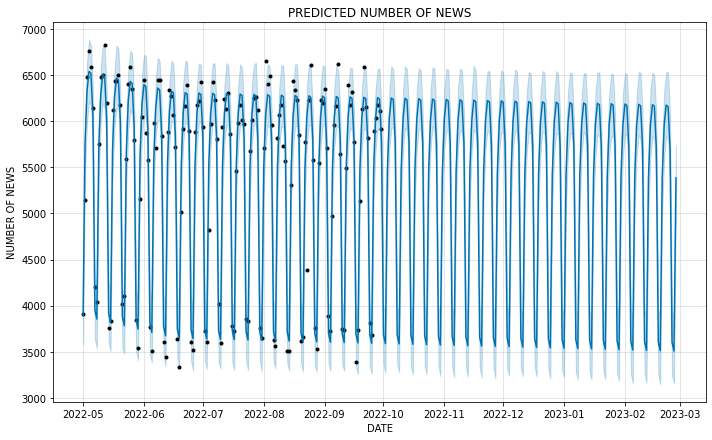

In [53]:
# reference - https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/
# plot the predicted news
import matplotlib.pyplot as plt
model_prophet.plot(pred_fore)
plt.xlabel('DATE')
plt.ylabel('NUMBER OF NEWS')
plt.title('PREDICTED NUMBER OF NEWS')
plt.show()
# note - the code is been adapted from the reference and it is modified